# Goals 
### Goal 1:Determine how much home advantage affects the result of the game
    Find winrates for home/away on non neutral fields
    Find winrates for home/away on neutral fields 
    Plot them on a graph. 
    



### Goal 2:Find out if games played on neutral location have smaller goal difference than rest of the games.
    Find the average goal difference on neutral fields.
    Find the average goal difference on non neutral fields. 
    graph.(done?)

    
### Goal 3: Different visualisations of the data. (Random facts) 
    Most commonly used location for neutral games 
    Most popular tournaments
    Win precentages?
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Reading in the data and converting it into an usable form
data = pd.read_csv('results.csv', header = None)
columns= ['Date', 'Home team', 'Away team', 'Home score', 'Away score', 'Tournament', 'City', 'Country', 'Neutral']
data.columns = columns
data.drop(index=0, inplace= True) # Removing the first line, as it contains column names.
data.head()

,Date,Home team,Away team,Home score,Away score,Tournament,City,Country,Neutral
1,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,FALSE
2,1873-03-08,England,Scotland,4,2,Friendly,London,England,FALSE
3,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,FALSE
4,1875-03-06,England,Scotland,2,2,Friendly,London,England,FALSE
5,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,FALSE


# Data cleaning and preparation.

In [3]:
#Removing the 'City' column as its not important in our application.
data.drop('City', inplace=True, axis=1)

In [4]:
#Adding a 'Score Difference' column
data['Home score'] = data['Home score'].astype("int")
data['Away score'] = data['Away score'].astype("int")

data['Score Difference'] = data['Home score'] - data['Away score']
data.head()

,Date,Home team,Away team,Home score,Away score,Tournament,Country,Neutral,Score Difference
1,1872-11-30,Scotland,England,0,0,Friendly,Scotland,FALSE,0
2,1873-03-08,England,Scotland,4,2,Friendly,England,FALSE,2
3,1874-03-07,Scotland,England,2,1,Friendly,Scotland,FALSE,1
4,1875-03-06,England,Scotland,2,2,Friendly,England,FALSE,0
5,1876-03-04,Scotland,England,3,0,Friendly,Scotland,FALSE,3


In [5]:
#Making a copy of the dataset for neutral and non neutral matches.
data_neutral = data.copy(deep=True)
data_neutral['Neutral'] = data_neutral['Neutral'].replace("FALSE", 0)
data_neutral['Neutral'] = data_neutral['Neutral'].replace("TRUE", 1)
data_neutral.drop(data_neutral[data_neutral['Neutral'] == 0].index, inplace = True) #Dropping all non neutral games.
data_neutral.head(5)

data_bias = data.copy(deep=True)
data_bias['Neutral'] = data_bias['Neutral'].replace("FALSE", 0)
data_bias['Neutral'] = data_bias['Neutral'].replace("TRUE", 1)
data_bias.drop(data_bias[data_bias['Neutral'] == 1].index, inplace = True) #Dropping all neutral games.
data_bias.head(5)

,Date,Home team,Away team,Home score,Away score,Tournament,Country,Neutral,Score Difference
1,1872-11-30,Scotland,England,0,0,Friendly,Scotland,0,0
2,1873-03-08,England,Scotland,4,2,Friendly,England,0,2
3,1874-03-07,Scotland,England,2,1,Friendly,Scotland,0,1
4,1875-03-06,England,Scotland,2,2,Friendly,England,0,0
5,1876-03-04,Scotland,England,3,0,Friendly,Scotland,0,3


# Goal 1

In [6]:
#Finding home and away winrates on non neutral fields
conditions = [
    (data_bias['Score Difference'] > 0),
    (data_bias['Score Difference'] < 0),
    (data_bias['Score Difference'] == 0)
]
values= ['Home', 'Away', 'Draw']
data_bias['Winner'] = np.select(conditions, values)


home_wr = str(round(len(data_bias[data_bias["Winner"] == "Home"]) / len(data_bias) * 100, 2))
print('Home winrate: ' + home_wr + '%')
away_wr = str(round(len(data_bias[data_bias["Winner"] == "Away"]) / len(data_bias) * 100, 2))
print('Away winrate: ' + away_wr + '%')
draw_wr = str(round(len(data_bias[data_bias["Winner"] == "Draw"]) / len(data_bias) * 100, 2))
print('Draw: ' + draw_wr + '%')


Home winrate: 50.45%
Away winrate: 26.44%
Draw: 23.11%


In [7]:
conditions = [
    (data_neutral['Score Difference'] > 0),
    (data_neutral['Score Difference'] < 0),
    (data_neutral['Score Difference'] == 0)
]
values= ['Home', 'Away', 'Draw']
data_neutral['Winner'] = np.select(conditions, values)


home_n_wr = str(round(len(data_neutral[data_neutral["Winner"] == "Home"]) / len(data_neutral) * 100, 2))
print('Home winrate: ' + home_n_wr + '%')
away_n_wr = str(round(len(data_neutral[data_neutral["Winner"] == "Away"]) / len(data_neutral) * 100, 2))
print('Away winrate: ' + away_n_wr + '%')
draw_n_wr = str(round(len(data_neutral[data_neutral["Winner"] == "Draw"]) / len(data_neutral) * 100, 2))
print('Draw: ' + draw_n_wr + '%')


Home winrate: 43.06%
Away winrate: 34.14%
Draw: 22.8%


In this case Home and away just reference to the teams position on the row, as the field is neutral.

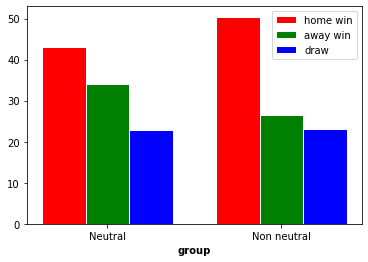

In [8]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [float(home_n_wr), float(home_wr)]
bars2 = [float(away_n_wr), float(away_wr)]
bars3 = [float(draw_n_wr), float(draw_wr)]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='r', width=barWidth, edgecolor='white', label='home win')
plt.bar(r2, bars2, color='g', width=barWidth, edgecolor='white', label='away win')
plt.bar(r3, bars3, color='b', width=barWidth, edgecolor='white', label='draw')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Neutral', 'Non neutral'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


# Goal 2


Text(0.5, 1.0, 'Mean goal difference in neutral and non neutral matches')

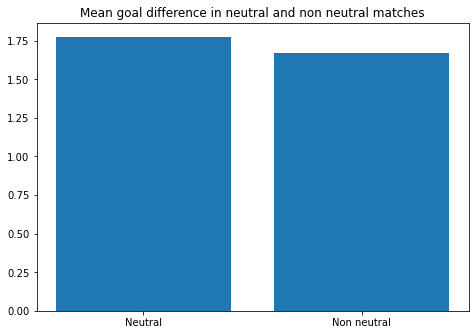

In [9]:
neutral = abs(data_neutral['Score Difference']).mean()
non_neutral = abs(data_bias['Score Difference']).mean()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['Neutral', 'Non neutral'], [neutral, non_neutral])
plt.title('Mean goal difference in neutral and non neutral matches')


# Friendly / not friendly (Goal 2 extended)

Text(0.5, 1.0, 'Mean goal difference in friendly and non friendly matches')

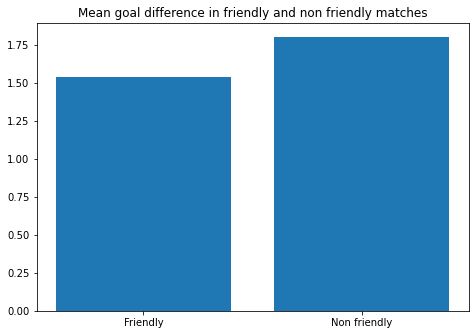

In [10]:
data_friendly = data['Tournament'] == 'Friendly'
mean_friendly = abs(data.loc[data_friendly, 'Score Difference']).mean()

data_nonfriendly = data['Tournament'] != 'Friendly'
mean_nonfriendly = abs(data.loc[data_nonfriendly, 'Score Difference']).mean()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['Friendly', 'Non friendly'], [mean_friendly, mean_nonfriendly])
plt.title('Mean goal difference in friendly and non friendly matches')

# Goal 3


<function matplotlib.pyplot.show(*args, **kw)>

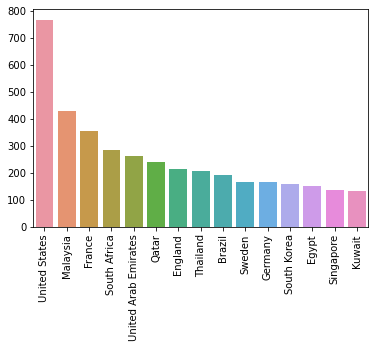

In [11]:
# Most commonly used location for neutral games

#data_neutral['Country'].value_counts()

sns.barplot(x= data_neutral['Country'].value_counts().index[:15], y= data_neutral['Country'].value_counts().values[:15] )
plt.xticks(rotation=90)
plt.show

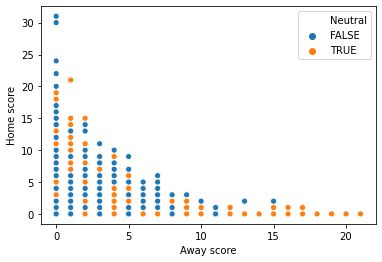

In [12]:
#Visualisation of scores in neutral and non neutral matches.

sns.scatterplot(y="Home score", x="Away score", hue="Neutral",data=data)
plt.show()

In [13]:
conditions = [
    (data['Score Difference'] > 0),
    (data['Score Difference'] < 0),
    (data['Score Difference'] == 0)
]
values= ['Home', 'Away', 'Draw']
data['Winner'] = np.select(conditions, values)


estonia_win = len(data[(data["Home team"] == "Estonia") & (data['Winner'] == "Home")]) + len(data[(data["Away team"] == "Estonia") & (data['Winner'] == "Away")])
estonia = len(data[(data["Home team"] == "Estonia")]) + len(data[(data["Away team"] == "Estonia")])
print('Estonias win rate: ' + str(round((estonia_win/estonia)*100 , 2)) + "%")

Estonias win rate: 25.37%
